# Setting the box size (`Lbox`) based on initial grid size (`levelmin`) and final resolution (`dx_fin`)

Define the scale factor and redshift as $a$ and $z$, respectively.
- scale factor: $a$  
- redshift: $z = \frac{1}{a} - 1$  

## Global Refinement Times

The global refinement times are fixed as follows.  

|                |        |       |      |     |     |     |      |
|----------------|--------|-------|------|-----|-----|-----|------|
| $a_\text{ref}$ | 0.0125 | 0.025 | 0.05 | 0.1 | 0.2 | 0.4 | 0.8  |
| $z_\text{ref}$ | 79     | 39    | 19   | 9   | 4   | 1.5 | 0.25 |


Set the starting scale factor to be $a_\text{start}$, with the condition that $a_\text{start} < a_\text{ref, min} = 0.0125$.  
The corresponding redshift is then given by $z_\text{start} = \frac{1}{a_\text{start}} - 1$.  

## Box Size and Cell Size Definitions

The side length of the simulation box is denoted by $L_\text{box}$, where subscripts $p$ and $c$ represent the proper and comoving scales, respectively.  
$L_{\text{box}, p} = a \times L_{\text{box}, c}$  

Define the initial side length of a cell as $dx_\text{ini}$, based on the box size and the initial number of cells.  
$dx_{\text{ini},c} = \frac{L_{\text{box}, c}}{N_\text{cell, ini}}$  

When a cell undergoes refinement, its size decreases by a factor of $2^{N_\text{ref}(a)}$. Here, $N_\text{ref}(a)$ represents the number of refinements a cell has experienced at a given $a$.  
The number of refinements is defined as follows.  
- $0 \leq a \lt 0.0125$: $N_{ref}(a) = 0$  
- $0.0125 \leq a \lt 0.025$: $N_{ref}(a) = 1$  
- $0.025 \leq a \lt 0.05$: $N_{ref}(a) = 2$  
- $0.05 \leq a \lt 0.1$: $N_{ref}(a) = 3$  
- $0.1 \leq a \lt 0.2$: $N_{ref}(a) = 4$  
- $0.2 \leq a \lt 0.4$: $N_{ref}(a) = 5$  
- $0.4 \leq a \lt 0.8$: $N_{ref}(a) = 6$  
- $0.8 \leq a$: $N_{ref}(a) = 7$  

Thus, the minimum cell size (i.e., resolution) can be expressed as follows.  
$dx_c(a) = \frac{L_{\text{box}, c}}{N_\text{ini, cell}} \times \frac{1}{2^{N_\text{ref}(a)}}$  
$dx_p(a) = a \times \frac{L_{\text{box}, c}}{N_\text{ini, cell}} \times \frac{1}{2^{N_\text{ref}(a)}}$  

## $1 kpc$ Target Resolution at $z=0$
If we want to achieve a finial proper resolution of $1 kpc$ at $z=0$ (i.e, $a=1$), then:  

$dx_p(a=1) = \frac{L_{\text{box}, c}}{N_\text{ini, cell}} \times \frac{1}{2^7} = 1 kpc = 1 ckpc = dx_c(a=1)$.  


From this, we can derive:  
$L_{\text{box},c} = N_\text{ini, cell} \times 2^7 ckpc$.  


Put $N_\text{ini, cell} = 2^\text{levelmin}$. Then,  
$L_{\text{box},c} = 2^{\text{levelmin} + 7} ckpc = \frac{2^{\text{levelmin} + 7}}{1000} cMpc$.  

**Note**: Since we are going to generate initial conditions with the MUSIC code and run the RAMSES code using AMR method, it is convenient to use a grid size that is a power of 2. Therefore, `levelmin` should be chosen accordingly as an integer value.

## General Case for Final Resolution $dx_\text{fin}$ at $z=0$
If the desired final resolution is $dx_\text{fin}$ at $z=0$, then:  
$dx_p(a=1) = \frac{L_{\text{box}, c}}{N_\text{ini, cell}} \times \frac{1}{2^7} = dx_{\text{fin},p} = dx_{\text{fin},c}$.    


From this, we can derive:  
$L_{\text{box},c} = N_\text{ini, cell} \times 2^7 \times dx_{\text{fin},c}$.  


Put $N_\text{ini, cell} = 2^\text{levelmin}$. Then,
$L_{\text{box},c} = 2^{\text{levelmin} + 7} \times dx_{\text{fin},c}$.  

# HR5 Simulation
In case of the HR5 simulation, `levelmin`$ = 13$, corresponding that their box size is $2^{20} kpc$ ($\approx 1 Gpc$).


From the HR5 papaer:
> The initial density field in a periodic box of 1049 cMpc size is generated on a 2563 grid where each cell size is 4.09 cMpc, while that for the high-resolution zoom region of 1049 × 119 × 127 cMpc3 is filled with 8192 × 930 × 994 cells with a side length of 128 ckpc. Inside the zoom region, 128 ckpc sized cells at level = 13 are gradually refined up to 1 kpc at level = 20 at z = 0. Note that the HR5 simulation stops at z = 0.625, and thus the final resolution inside the zoom region is stopped at 2 ckpc. To avoid low-resolution particles from outside the region of interest contaminating the high-resolution region, four intermediate buffer regions of level = 9–12 surround the zoom region (see Figure 1).


# Imports

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter settings

In [32]:
# For given parameters, Lbox will be determined.
z0       = 200  # starting redshift
levelmin = 10   # initial cell size = 2**levelmin
dx_fin   = 1    # [kpc] or [ckpc]: final resolution at z=0
FlagAMR  = 1    # flag for AMR

print("For given paramters:")
print(f"  - z_start   = {z0}")
print(f"  - levelmin  = {levelmin} (#cell = {2**levelmin})")
print(f"  - dx_fin    = {dx_fin} [kpc] at z = 0 (target resolution)")
print(f"  - FlagAMR   = {FlagAMR} (1: Turn on AMR, 0: Turn off AMR)")

For given paramters:
  - z_start   = 200
  - levelmin  = 10 (#cell = 1024)
  - dx_fin    = 1 [kpc] at z = 0 (target resolution)
  - FlagAMR   = 1 (1: Turn on AMR, 0: Turn off AMR)


In [22]:
# Starting redshift and scale factor
a0 = 1/(z0 + 1)

# Testing scale factor and redshift arrays
a = np.linspace(a0, 1, 100)
z = 1/a - 1

# Global refinemnent times (fixed)
if FlagAMR == 0: a_refine = np.array([])
if FlagAMR == 1: a_refine = np.array([0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8])
z_refine = 1/a_refine - 1
n_refine = np.digitize(a, bins=a_refine) # the number of refinements

# Level settins
levelmax = levelmin + len(a_refine) # level at z=0
# If a_start < a_refine.min(), just add len(a_refine).
# If a_start > a_refine.min(), the code has to be modified.

# Box size calculation
n_cell0 = 2**levelmin          # initial number of cell
c_Lbox_kpc = 2**levelmax * dx_fin # [ckpc] comoving box size
c_Lbox_Mpc = c_Lbox_kpc/1000   # [cMpc] comoving box size
p_Lbox_kpc = a * c_Lbox_kpc    # [pMpc] proper   box size
p_Lbox_Mpc = a * c_Lbox_Mpc    # [pMpc] proper   box size

# Cell size calculation (Resolution)
c_dx0_kpc = c_Lbox_kpc / n_cell0   # [ckpc] comoving initial cell size
p_dx0_kpc = a0 * c_dx0_kpc         # [pkpc] proper   initial cell size
c_dx_kpc = c_dx0_kpc / 2**n_refine # [ckpc] comoving cell size
p_dx_kpc = a * c_dx_kpc            # [pkpc] proper   cell size

In [23]:
# dimensionless hubble parameter
h = 0.72

In [24]:
# Print the parameters
print(f"Starting redshift (z0): {z0}")
print(f"Starting scale factor (a0): 1/{z0} = {a0}")
print(f"Global refinement times:")
for a_r, z_r in zip(a_refine, z_refine):
    print(f"  a = {a_r:10.4f}, z = {z_r:10.4f}")
print(f"Minimum level (levelmin): {levelmin}")
print(f"Maximum level (levelmax): {levelmax}")
print(f"Initial number of cells (n_cell0): 2^(levelmin) = {n_cell0}")
print(f"Initial comoving cell size (c_dx0) in ckpc: {c_dx0_kpc:10.4f}")
print(f"Initial proper   cell size (p_dx0) in pkpc: {p_dx0_kpc:10.4f}")
print(f"Comoving box size (c_Lbox) in cMpc: {c_Lbox_Mpc:10.4f}")
print(f"Comoving box size (c_Lbox) in cMpc/h: {c_Lbox_Mpc*h:10.4f}")

Starting redshift (z0): 200
Starting scale factor (a0): 1/200 = 0.004975124378109453
Global refinement times:
  a =     0.0125, z =    79.0000
  a =     0.0250, z =    39.0000
  a =     0.0500, z =    19.0000
  a =     0.1000, z =     9.0000
  a =     0.2000, z =     4.0000
  a =     0.4000, z =     1.5000
  a =     0.8000, z =     0.2500
Minimum level (levelmin): 9
Maximum level (levelmax): 16
Initial number of cells (n_cell0): 2^(levelmin) = 512
Initial comoving cell size (c_dx0) in ckpc: 128000.0000
Initial proper   cell size (p_dx0) in pkpc:   636.8159
Comoving box size (c_Lbox) in cMpc: 65536.0000
Comoving box size (c_Lbox) in cMpc/h: 47185.9200


<IPython.core.display.Javascript object>


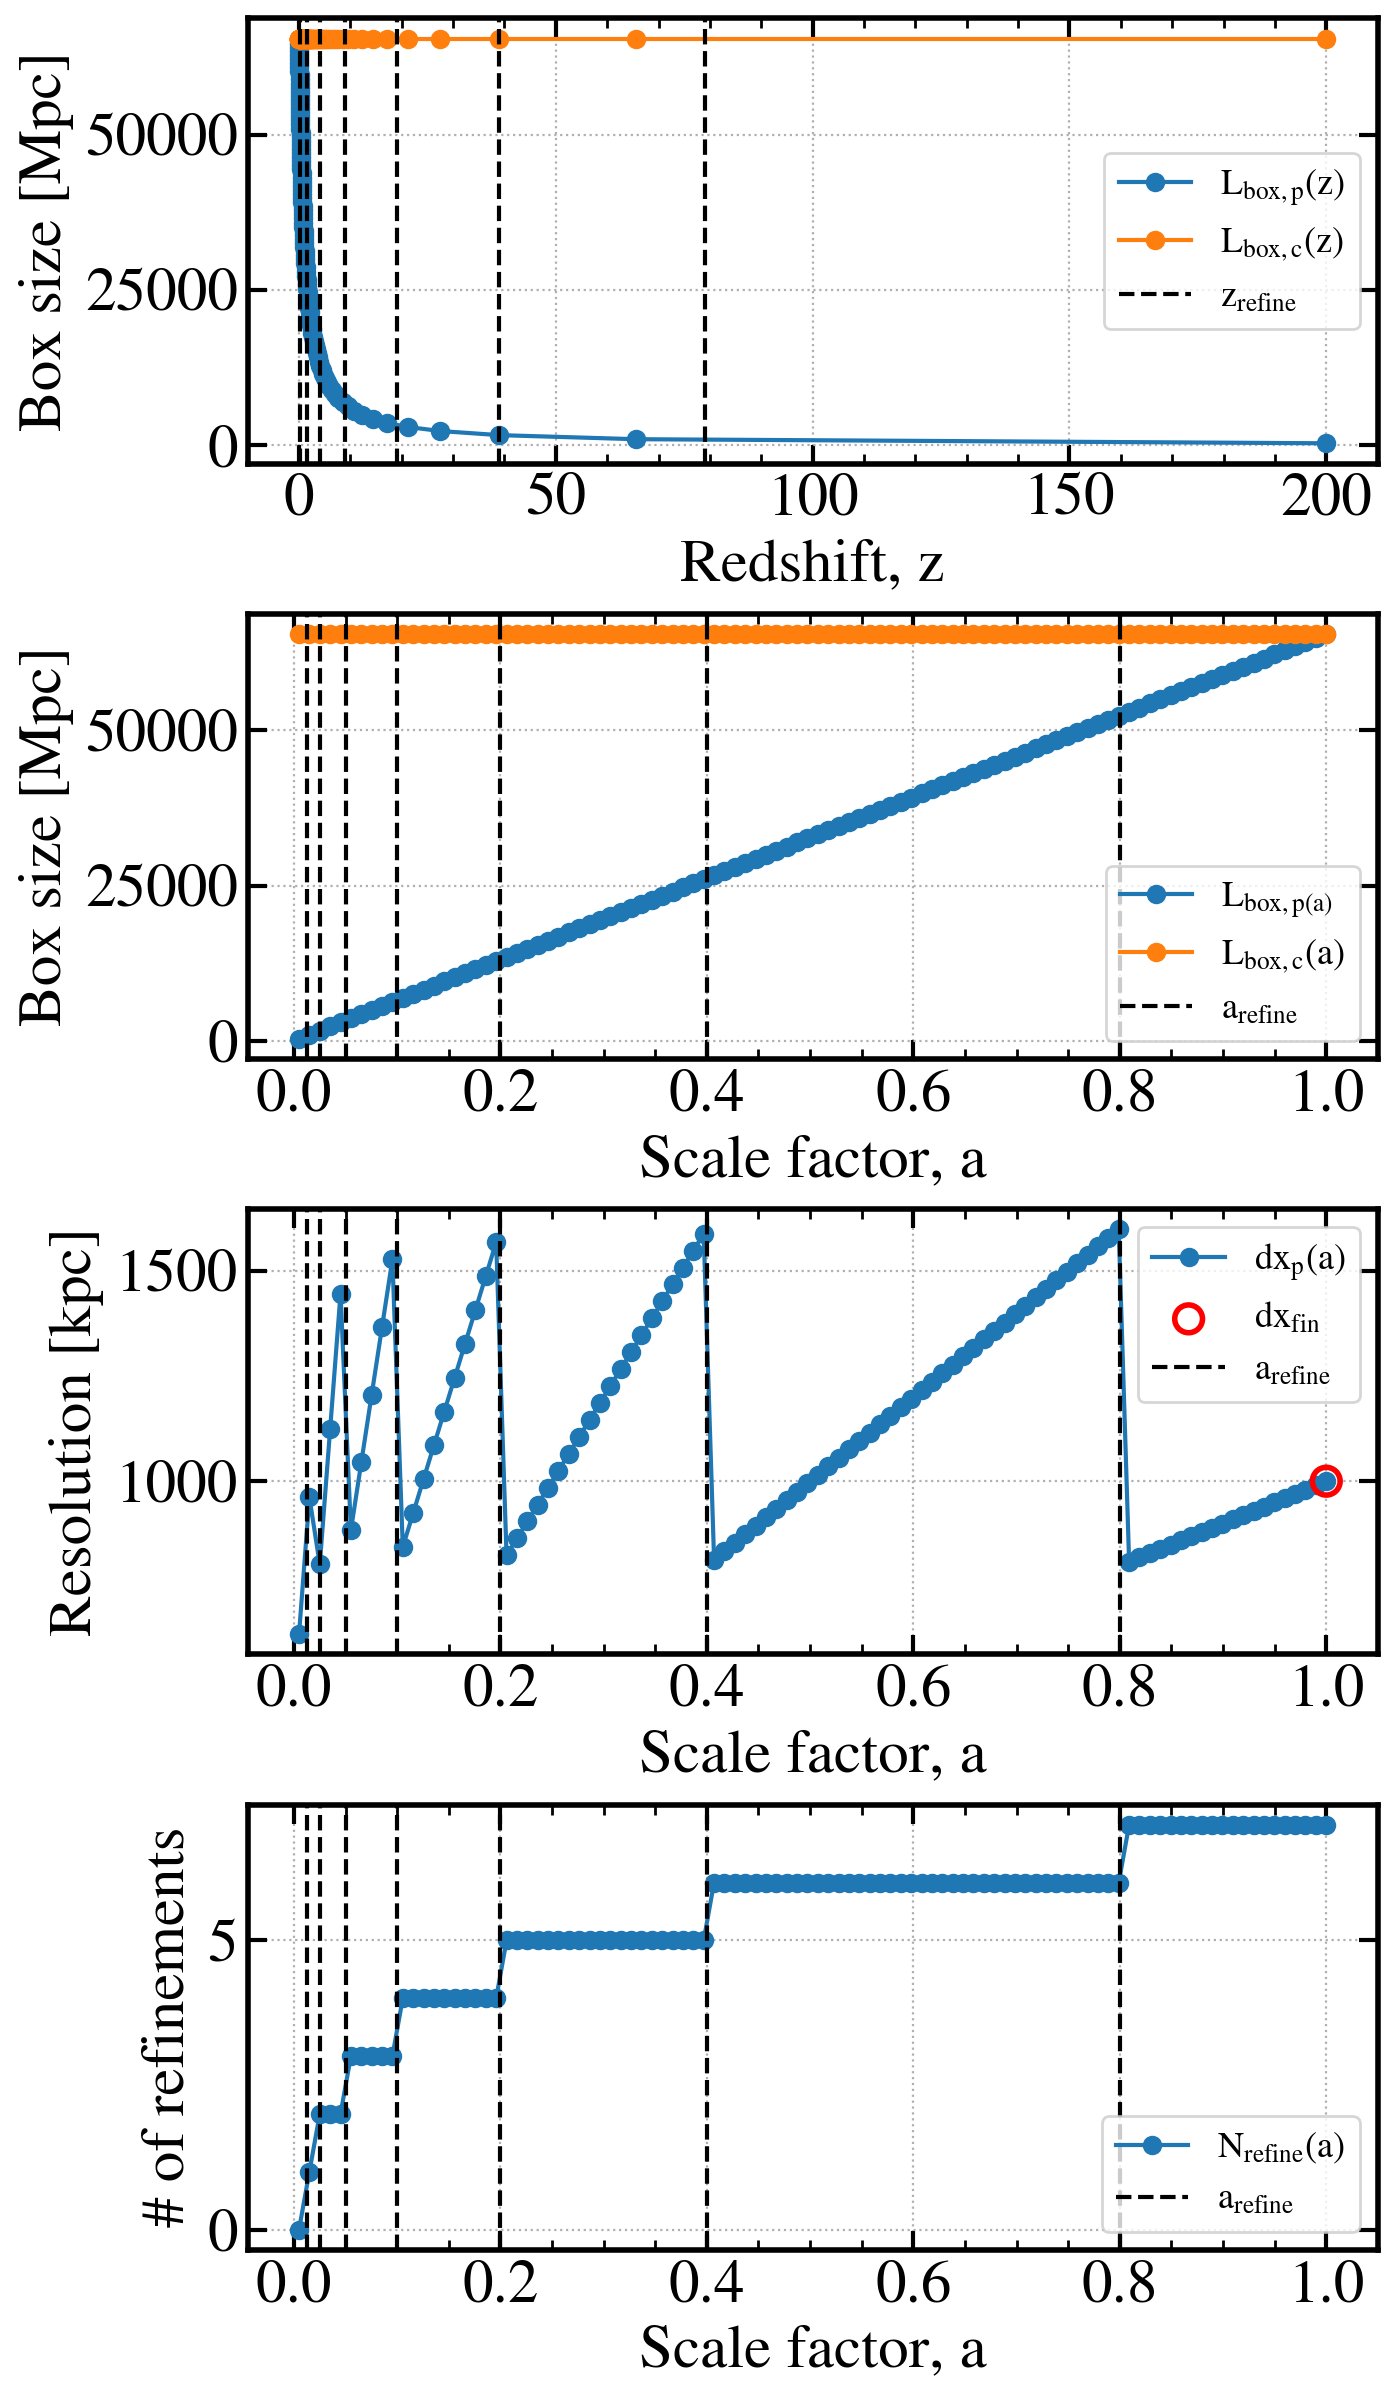

In [25]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(7, 12))

ax[0].plot(z, p_Lbox_Mpc, 'o-', label=r"$\rm L_{box,p}(z)$")
ax[0].plot(z, [c_Lbox_Mpc]*len(a), 'o-', label=r"$\rm L_{box,c}(z)$")
for i in range(len(z_refine)):
    ax[0].axvline(z_refine[i], ls="--", c='k')
ax[0].plot(np.nan, np.nan, ls="--", c='k', label=r"$\rm z_{refine}$")
ax[0].set_xlabel("Redshift, z")
ax[0].set_ylabel(r"Box size [Mpc]")
ax[0].legend(fontsize=13)
ax[0].grid(ls=":")


ax[1].plot(a, p_Lbox_Mpc, 'o-', label=r"$\rm L_{box,p(a)}$")
ax[1].plot(a, [c_Lbox_Mpc]*len(a), 'o-', label=r"$\rm L_{box,c}(a)$")
for i in range(len(a_refine)):
    ax[1].axvline(a_refine[i], ls="--", c='k')
ax[1].plot(np.nan, np.nan, ls="--", c='k', label=r"$\rm a_{refine}$")
ax[1].set_xlabel("Scale factor, a")
ax[1].set_ylabel(r"Box size [Mpc]")
ax[1].legend(fontsize=13)
ax[1].grid(ls=":")


ax[2].plot(a, p_dx_kpc, 'o-', label=r"$\rm dx_{p}(a)$")
ax[2].scatter([1], [dx_fin], fc='none', ec='r', s=100, lw=2, zorder=3, label=r"$\rm dx_{fin}$")
for i in range(len(a_refine)):
    ax[2].axvline(a_refine[i], ls="--", c='k')
ax[2].plot(np.nan, np.nan, ls="--", c='k', label=r"$\rm a_{refine}$")
ax[2].set_xlabel("Scale factor, a")
ax[2].set_ylabel(r"Resolution [kpc]")
ax[2].legend(fontsize=13)
ax[2].grid(ls=":")


ax[3].plot(a, n_refine, 'o-', label=r"$\rm N_{refine}(a)$")
for i in range(len(a_refine)): ax[3].axvline(a_refine[i], ls="--", c='k')
ax[3].plot(np.nan, np.nan, ls="--", c='k', label=r"$\rm a_{refine}$")
ax[3].set_xlabel("Scale factor, a")
ax[3].set_ylabel("# of refinements")
ax[3].legend(fontsize=13)
ax[3].grid(ls=":")

plt.tight_layout(pad=0.3)